In [1]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
def get_dataset(filename):
    dataset = read_csv(filename, header=None)
    data = dataset.values
    X, y = data[:, :-1], data[:, -1]
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

In [3]:
def get_models():
    models = dict()
    for i in range(1,100):
        trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

In [4]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [5]:
X, y = get_dataset('sonar.csv')

In [6]:
models = get_models()

In [7]:
results = list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(mean(scores))
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

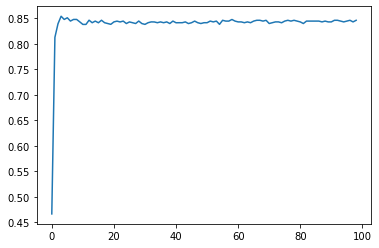

In [8]:
pyplot.plot(results)
pyplot.show()